<a href="https://colab.research.google.com/github/Charly87rp/TP-DataScience/blob/main/Desempleo_en_Espa%C3%B1a_A%C3%B1o_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desempleo durante el 2020 en España

## Contexto del proyecto

Durante el año 2020 hubo mucha incertidumbre sobre la veracidad de los datos de desempleo ofrecidos por las entidades oficiales en España. Se ha llegado a la conclusión de que de enero a noviembre los datos de desempleo en ese país son veraces y precisos. Sin embargo, se han puesto en duda los números para diciembre de ese año.

## Objetivo del proyecto

Nos proponemos pronosticar mediante un modelo de regresión lineal el desempleo de cada Comunidad Autónoma de España para diciembre de 2020. Para ello, utilizaremos los datos que sabemos que son ciertos de enero a noviembre de ese mismo año. El objetivo final es poder comparar el dato oficial de ese año con la predicción del modelo para observar el grado de similitud de estos datos y poder inferir si la veracidad del dato oficial es más o menos probable. Particularmente, nos importa los datos de desempleo de la Comunidad de Cataluña y la Comunidad de Madrid.

## Análisis del dataset y limpieza general de los datos

Importamos la librería pandas para trabajar.

In [1]:
import pandas as pd

Procedemos a la carga del Data Frame y verificamos posibles errores que pudiera tener esto.

In [2]:
try:
    df = pd.read_csv('Paro_por_municipios_20202.csv')
    print("Sin errores")
except FileNotFoundError:
    print("No existe el archivo")
except pd.errors.EmptyDataError:
    print("Archivo sin datos")
except pd.errors.ParserError:
    print("Error cargando el archivo")

Sin errores


Cantidad de registros, cantidad de columnas. Para conocer las proporciones de nuestro dataset.

In [6]:
df.shape

(89446, 20)

Detalle de las columnas

In [7]:
print(df.columns)

Index(['Código mes ', 'mes', 'Código de CA', 'Comunidad Autónoma',
       'Codigo Provincia', 'Provincia', 'Codigo Municipio', ' Municipio',
       'total Paro Registrado', 'Paro hombre edad < 25',
       'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45',
       'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ',
       'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria',
       'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior;;;'],
      dtype='object')


Obtenemos los 10 primeros registros para tener una idea de cómo se componen los registros del dataset

In [8]:
df.head(10)

,Código mes,mes,Código de CA,Comunidad Autónoma,Codigo Provincia,Provincia,Codigo Municipio,Municipio,total Paro Registrado,Paro hombre edad < 25,Paro hombre edad 25 -45,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro mujer edad >=45,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior;;;
0,202001,Enero de 2020,1,Andalucía,4,Almería,4001,Abla,84,6,11,27,4,25,11,13,3,4,55,9;;;
1,202001,Enero de 2020,1,Andalucía,4,Almería,4002,Abrucena,76,5,10,19,8,17,17,7,4,13,44,8;;;
2,202001,Enero de 2020,1,Andalucía,4,Almería,4003,Adra,1989,92,347,415,78,541,516,362,67,198,1178,184;;;
3,202001,Enero de 2020,1,Andalucía,4,Almería,4004,Albánchez,22,1,3,12,0,5,1,2,3,0,16,1;;;
4,202001,Enero de 2020,1,Andalucía,4,Almería,4005,Alboloduy,37,2,10,8,1,10,6,8,6,7,15,1;;;
5,202001,Enero de 2020,1,Andalucía,4,Almería,4006,Albox,750,40,105,163,33,231,178,63,35,88,501,63;;;
6,202001,Enero de 2020,1,Andalucía,4,Almería,4007,Alcolea,81,3,11,33,7,16,11,11,0,18,49,3;;;
7,202001,Enero de 2020,1,Andalucía,4,Almería,4008,Alcóntar,23,0,2,10,2,5,4,4,2,2,14,1;;;
8,202001,Enero de 2020,1,Andalucía,4,Almería,4009,Alcudia de Monteagud,3,0,0,2,0,0,1,1,0,0,2,0;;;
9,202001,Enero de 2020,1,Andalucía,4,Almería,4010,Alhabia,70,6,14,25,1,15,9,1,13,22,29,5;;;


Averiguamos el tipo de dato de cada columna para saber si necesitamos cambiar algo antes de empezar a trabajar de lleno. Vemos en lista las columnas que manejamos.

In [9]:
df.dtypes

Código mes                      int64
mes                            object
Código de CA                    int64
Comunidad Autónoma             object
Codigo Provincia                int64
Provincia                      object
Codigo Municipio                int64
 Municipio                     object
total Paro Registrado           int64
Paro hombre edad < 25           int64
Paro hombre edad 25 -45         int64
Paro hombre edad >=45           int64
Paro mujer edad < 25            int64
Paro mujer edad 25 -45          int64
Paro mujer edad >=45            int64
Paro Agricultura                int64
Paro Industria                  int64
Paro Construcción               int64
Paro Servicios                  int64
Paro Sin empleo Anterior;;;    object
dtype: object

Modificamos los códigos de mes, de Comunidad Autónoma, de Municipio y de Provincia. Los pasamos a string por no tener una importancia numérica real para el proyecto y no confundir al modelo.

In [10]:
df['Código mes '] = df['Código mes '].astype(str)
df['Código de CA'] = df['Código de CA'].astype(str)
df['Codigo Municipio'] = df['Codigo Municipio'].astype(str)
df['Codigo Provincia'] = df['Codigo Provincia'].astype(str)

Hay valores en la columna "Paro Sin empleo Anterior" que tienen errores de tipeo. Se encuentran tres tipos de errores fáciles de reparar reemplazando pocos caracteres. Los arreglamos porque no pueden tomarse como valores numéricos que pueden (o no) ser útiles para el objetivo del proyecto.

In [11]:
df['Paro Sin empleo Anterior;;;'] = df['Paro Sin empleo Anterior;;;'].str.replace(';;;', '')
df['Paro Sin empleo Anterior;;;'] = df['Paro Sin empleo Anterior;;;'].str.replace(';;', '')
df['Paro Sin empleo Anterior;;;'] = df['Paro Sin empleo Anterior;;;'].str.replace(';', '')

Arreglamos de igual manera, el nombre de la columna cuyos valores acabamos de corregir.

In [12]:
df = df.rename(columns={"Paro Sin empleo Anterior;;;": "Paro Sin empleo Anterior"})

Habiendo hecho todos los arreglos en esta columna y ahora que todos los datos son numéricos, cambiamos la categoría de sus datos a int.

In [13]:
df['Paro Sin empleo Anterior'] = df['Paro Sin empleo Anterior'].astype(int)

Como ya sabemos que todos los meses pertenecen al año 2020, sacamos la parte que dice "de 2020" en cada registro. Esto se hace para que en el gráfico que hagamos se mejore la visualización en los ejes, sacando un dato que es prescindible.

In [14]:
df['mes'] = df['mes'].str.replace(' de 2020', '')

El código del mes es un dato **evidentemente** inútil para el proyecto, por lo que lo eliminamos. Podríamos eliminar otras columnas, pero pueden ser útiles a otro análisis de un interés que pueda surgir durante el proyecto actual. No es prudente eliminar columnas tan pronto.

In [15]:
df = df.drop("Código mes ",axis=1)

Averiguamos la información del data frame para ver que todo este en orden antes de proseguir con el desarrollo del proyecto.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89446 entries, 0 to 89445
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   mes                       89446 non-null  object
 1   Código de CA              89446 non-null  object
 2   Comunidad Autónoma        89446 non-null  object
 3   Codigo Provincia          89446 non-null  object
 4   Provincia                 89446 non-null  object
 5   Codigo Municipio          89446 non-null  object
 6    Municipio                89446 non-null  object
 7   total Paro Registrado     89446 non-null  int64 
 8   Paro hombre edad < 25     89446 non-null  int64 
 9   Paro hombre edad 25 -45   89446 non-null  int64 
 10  Paro hombre edad >=45     89446 non-null  int64 
 11  Paro mujer edad < 25      89446 non-null  int64 
 12  Paro mujer edad 25 -45    89446 non-null  int64 
 13  Paro mujer edad >=45      89446 non-null  int64 
 14  Paro Agricultura      

## Análisis descriptico de los datos del proyecto

Usamos un "describe" para obtener la información. A primera vista, podríamos decir algunas cosas como que:

1.   La mitad de los municipios tienen 29 personas desempleadas o menos.
2.   El promedio de desempleados por municipio es de aproximadamente 454 personas.
3.   El valor máximo de desempleados de un municipio es de 209.851 personas; un valor muy por encima del promedio.
4.   El desvío estándar es alto, por lo que hay una gran dispersión en la cantidad de personas desocupadas por municipio.

Sin embargo, este análisis es incorrecto, ya que se repiten datos por no tener en cuenta el orden cronológico. Se han tomado 11 datos (uno por cada mes) para cada municipio, por lo que pudimos haber contabilizado hasta 11 veces a un mismo desempleado que conservó ese status durante todos esos periodos registrados.



In [17]:
df.describe()

,total Paro Registrado,Paro hombre edad < 25,Paro hombre edad 25 -45,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro mujer edad >=45,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,Paro Sin empleo Anterior
count,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000,89446.000000
mean,454.237887,20.264685,78.666682,94.204369,19.042428,114.095152,127.964571,21.428907,37.645406,37.057890,320.887586,37.218098
std,3280.055245,133.928076,599.450907,703.722326,130.123182,804.678610,919.586694,94.865165,209.016212,245.749573,2542.734989,281.812627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,29.000000,1.000000,4.000000,7.000000,1.000000,6.000000,8.000000,2.000000,2.000000,2.000000,19.000000,1.000000
75%,160.000000,7.000000,25.000000,36.000000,7.000000,39.000000,43.000000,9.000000,15.000000,13.000000,101.000000,9.000000
max,209851.000000,9080.000000,38813.000000,45800.000000,9046.000000,52621.000000,57920.000000,4119.000000,8599.000000,14956.000000,171844.000000,15248.000000


Para hacer más prolijo nuestro análisis y empezar a enfocarnos en nuestro objetivo, agruparemos los valores por Comunidad Autónoma, en lugar de por Municipios (tampoco lo haremos por Provincia). Aplicaremos un describe a esto para ver el comportamiento de los datos. Aunque ya sabemos acerca de la limitación cronológica que vimos antes.

In [18]:
desempleo_por_comunidad = df.groupby("Comunidad Autónoma")
for group_name, group_df in desempleo_por_comunidad:
  print(f"\nanalisis categoria '{group_name}' :")
  print(group_df['total Paro Registrado'].describe())


analisis categoria 'Andalucía' :
count     8607.000000
mean      1195.468921
std       4718.305863
min          0.000000
25%         72.000000
50%        216.000000
75%        706.000000
max      82307.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Aragón' :
count     8041.000000
mean       103.063176
std       1626.642509
min          0.000000
25%          2.000000
50%          6.000000
75%         19.000000
max      46141.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Asturias; Principado de' :
count      858.000000
mean      1009.505828
std       3236.227618
min          3.000000
25%         47.250000
50%        155.000000
75%        647.750000
max      24523.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Balears; Illes' :
count      737.000000
mean      1074.854817
std       3643.970357
min          2.000000
25%        113.000000
50%        280.000000
75%        755.000000
max      34525.000000
Name: total 

Vamos a tomar el mes de noviembre para analizar cómo eran los datos el mes anterior al que pretendemos predecir. Le aplicaremos nuevamente un describe. En este caso, hemos eliminado la repetición de datos por la cuestión cronológica y estos datos sí son realmente útiles. Podemos conocer ahora sí el desvío estándar, el promedio, y los cuartiles de desempleo de cada Comunidad Autónoma de España para noviembre de 2020. Remitiéndonos a las dos Comunidades Autónomas de nuestro interés, podemos ver que:

- **Cataluña** tiene una media de 511 desempleados durante noviembre 2020 entre todos sus municipios; que tiene al menos un municipio donde no hay desempleados; que tiene un municipio con un máximo de 92.401 desempleados; y que en 3/4 de los municipios hay menos de 230 personas desempleadas. El desvío estándar es 3.332, por lo que hay una alta dispersión.

- **Comunidad de Madrid** tiene una media de 2.401 desempleados durante noviembre 2020 entre todos sus municipios; que en todos los municipios hay al menos un desempleado; que tiene un municipio con un máximo de 209.851 desempleados; y que en 3/4 de los municipios hay menos de 790 personas desempleadas. El desvío estándar es 15.838, por lo que hay una alta dispersión.

In [19]:
mes_key = "Noviembre"

mes_elegido = df[df['mes'].str.contains(mes_key, case = False)]

grupos = mes_elegido.groupby("Comunidad Autónoma")

for group_name, group_df in grupos:
  print(f"\nanalisis categoria '{group_name}' :")
  print(group_df['total Paro Registrado'].describe())


analisis categoria 'Andalucía' :
count      785.000000
mean      1231.215287
std       4926.575163
min          2.000000
25%         69.000000
50%        206.000000
75%        679.000000
max      81996.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Aragón' :
count      731.000000
mean       109.652531
std       1687.894481
min          0.000000
25%          2.000000
50%          7.000000
75%         21.500000
max      45378.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Asturias; Principado de' :
count       78.000000
mean      1045.051282
std       3347.044383
min          7.000000
25%         52.750000
50%        165.000000
75%        674.000000
max      23689.000000
Name: total Paro Registrado, dtype: float64

analisis categoria 'Balears; Illes' :
count       67.000000
mean      1273.582090
std       4242.848875
min          3.000000
25%        127.500000
50%        356.000000
75%        887.500000
max      34525.000000
Name: total 

Lógicamente, los municipios de Barcelona y Madrid deberían ser los máximos que arroja el describe. Pero lo corroboramos.

In [20]:
mes_key = "Noviembre"
mes_elegido = df[df['mes'].str.contains(mes_key, case=False)]

maximos_por_comunidad = mes_elegido.groupby('Comunidad Autónoma')['total Paro Registrado'].max()

tabla_maximos = mes_elegido[mes_elegido['total Paro Registrado'].isin(maximos_por_comunidad)]
comunidades_interes = ['Cataluña', 'Madrid; Comunidad de']
tabla_maximos = tabla_maximos[tabla_maximos['Comunidad Autónoma'].isin(comunidades_interes)]
print(tabla_maximos[[' Municipio', 'total Paro Registrado']])

       Municipio  total Paro Registrado
86348  Barcelona                  92401
88600     Madrid                 209851


## Visualización de los datos

Importamos la librería de matplotlib.

In [21]:
import matplotlib.pyplot as plt

Graficamos el nivel de desempleo por meses del 2020 agrupados por Comunidad Autónoma.

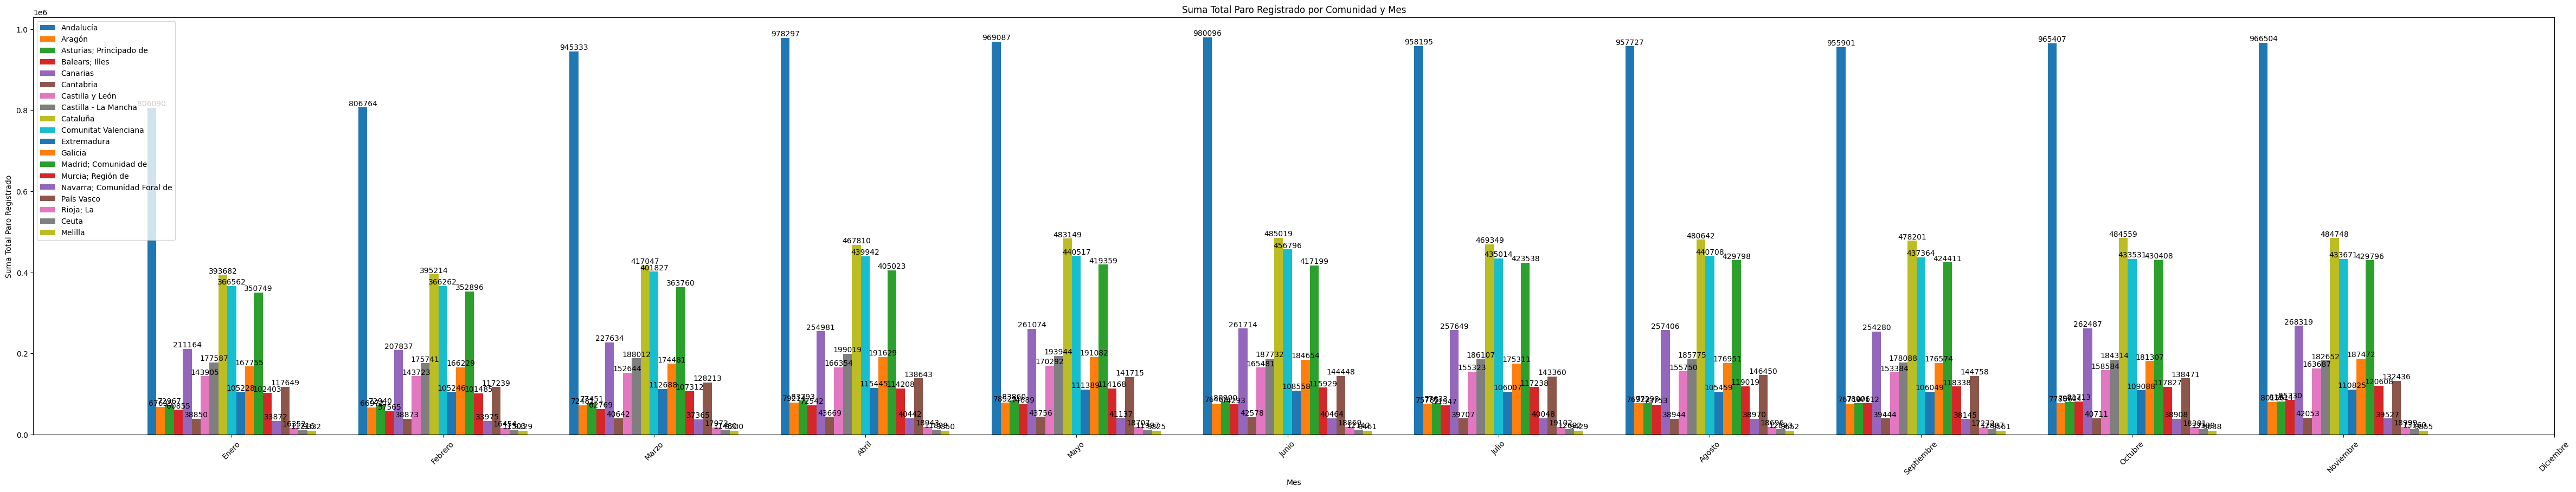

In [22]:
import numpy as np

suma_total_por_mes_comunidades = df.groupby(["Comunidad Autónoma", "mes"])["total Paro Registrado"].sum()

comunidades_unicas = df["Comunidad Autónoma"].unique()

meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
suma_total_por_mes_comunidades = suma_total_por_mes_comunidades.unstack().reindex(columns=meses_ordenados)

plt.figure(figsize=(60, 10))
ancho_barras = 0.8 / len(comunidades_unicas)

for i, comunidad in enumerate(comunidades_unicas):
    comunidad_data = df[df['Comunidad Autónoma'] == comunidad]
    suma_total_por_mes_comunidad = comunidad_data.groupby("mes")["total Paro Registrado"].sum()
    suma_total_por_mes_comunidad = suma_total_por_mes_comunidad.reindex(meses_ordenados)

    x = np.arange(len(suma_total_por_mes_comunidad))
    plt.bar(x + i * ancho_barras, suma_total_por_mes_comunidad, width=ancho_barras, label=comunidad)

plt.xlabel('Mes')
plt.ylabel('Suma Total Paro Registrado')
plt.title('Suma Total Paro Registrado por Comunidad y Mes')
plt.xticks(np.arange(len(meses_ordenados)) + (len(comunidades_unicas) - 1) * ancho_barras / 2, meses_ordenados, rotation=45)
plt.legend()

for comunidad in comunidades_unicas:
    comunidad_data = df[df['Comunidad Autónoma'] == comunidad]
    suma_total_por_mes_comunidad = comunidad_data.groupby("mes")["total Paro Registrado"].sum()
    suma_total_por_mes_comunidad = suma_total_por_mes_comunidad.reindex(meses_ordenados)

    for i, value in enumerate(suma_total_por_mes_comunidad):
        if not np.isnan(value):
            plt.text(i + (comunidades_unicas.tolist().index(comunidad)) * ancho_barras, value, str(int(value)), ha='center', va='bottom')

plt.show()


Graficamos únicamente para Cataluña y para la Comunidad de Madrid, la evolución del desempleo de enero a noviembre de 2020. Podemos observar que Cataluña, a pesar de que su máximo valor entre los minicipios (Barcelona) sea menos de la mitad que el máximo valor entre los municipios de la Comunidad de Madrid (Madrid), la suma del desempleo en toda la comunidad es mayor. Es decir, el total del desempleo de Cataluña ha sido mayor durante los primeros 11 meses del año 2020 al total del desempleo de la Comunidad de Madrid.

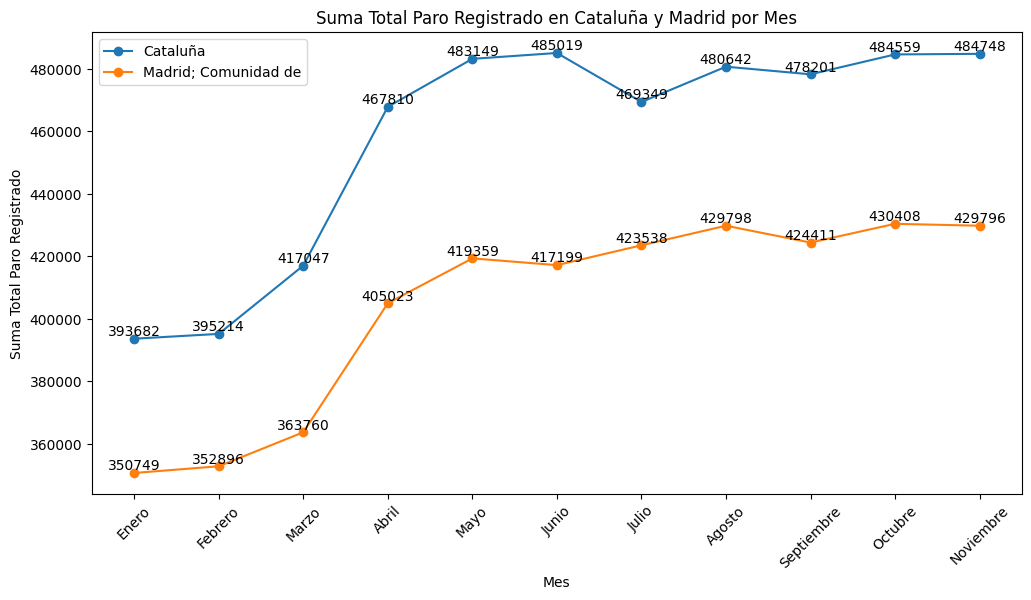

In [23]:
cataluna_data = df[df['Comunidad Autónoma'] == 'Cataluña']
madrid_data = df[df['Comunidad Autónoma'] == 'Madrid; Comunidad de']

suma_total_por_mes_cataluna = cataluna_data.groupby("mes")["total Paro Registrado"].sum()
suma_total_por_mes_madrid = madrid_data.groupby("mes")["total Paro Registrado"].sum()

meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
suma_total_por_mes_cataluna = suma_total_por_mes_cataluna.reindex(meses_ordenados)
suma_total_por_mes_madrid = suma_total_por_mes_madrid.reindex(meses_ordenados)

plt.figure(figsize=(12, 6))
plt.plot(suma_total_por_mes_cataluna.index, suma_total_por_mes_cataluna.values, label='Cataluña', marker='o')
plt.plot(suma_total_por_mes_madrid.index, suma_total_por_mes_madrid.values, label='Madrid; Comunidad de', marker='o')

plt.xlabel('Mes')
plt.ylabel('Suma Total Paro Registrado')
plt.title('Suma Total Paro Registrado en Cataluña y Madrid por Mes')
plt.xticks(rotation=45)
plt.legend()

for x, y in zip(suma_total_por_mes_cataluna.index, suma_total_por_mes_cataluna.values):
    if not np.isnan(y):
        plt.text(x, y, str(int(y)), ha='center', va='bottom')

for x, y in zip(suma_total_por_mes_madrid.index, suma_total_por_mes_madrid.values):
    if not np.isnan(y):
        plt.text(x, y, str(int(y)), ha='center', va='bottom')

plt.show()


Visualizamos con gráfico de barras lo anterior.

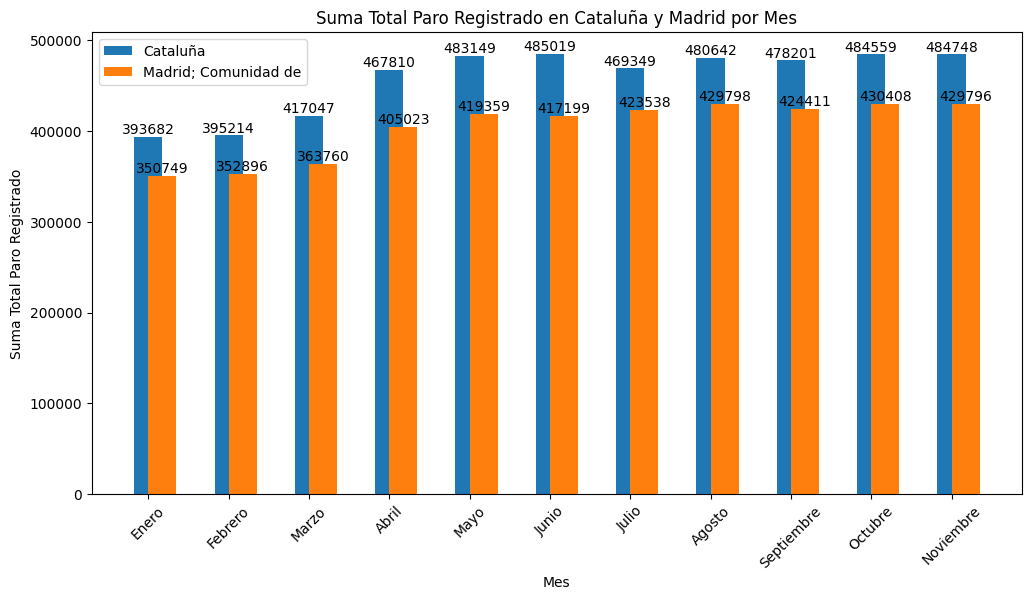

In [24]:
cataluna_data = df[df['Comunidad Autónoma'] == 'Cataluña']
madrid_data = df[df['Comunidad Autónoma'] == 'Madrid; Comunidad de']

suma_total_por_mes_cataluna = cataluna_data.groupby("mes")["total Paro Registrado"].sum()
suma_total_por_mes_madrid = madrid_data.groupby("mes")["total Paro Registrado"].sum()


meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
suma_total_por_mes_cataluna = suma_total_por_mes_cataluna.reindex(meses_ordenados)
suma_total_por_mes_madrid = suma_total_por_mes_madrid.reindex(meses_ordenados)

plt.figure(figsize=(12, 6))
ancho_barras = 0.35
bar1 = plt.bar(suma_total_por_mes_cataluna.index, suma_total_por_mes_cataluna.values, width=ancho_barras, label='Cataluña')
bar2 = plt.bar([mes for mes in suma_total_por_mes_madrid.index], suma_total_por_mes_madrid.values, width=ancho_barras, label='Madrid; Comunidad de', align='edge')

plt.xlabel('Mes')
plt.ylabel('Suma Total Paro Registrado')
plt.title('Suma Total Paro Registrado en Cataluña y Madrid por Mes')
plt.xticks(rotation=45)
plt.legend()

for bar in bar1:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()


Realizamos dos boxplots que contengan la dispersión de los datos según municipios para las dos Comunidades Autónomas en las que nos focalizamos para el mes de noviembre. En ambos casos se ven los datos máximos muy por encima del gráfico )Barcelona y Madrid).

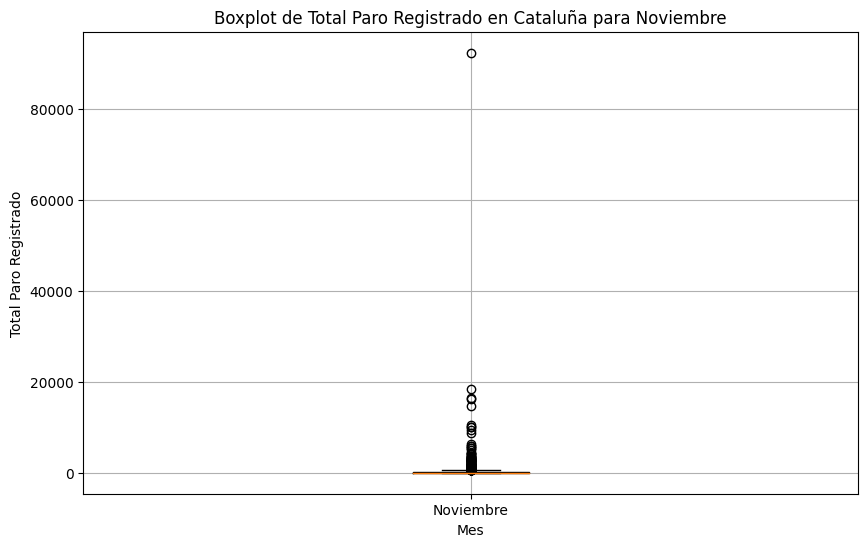

In [25]:
noviembre_cataluna_df = df[(df['mes'] == 'Noviembre') & (df['Comunidad Autónoma'] == 'Cataluña')]

plt.figure(figsize=(10, 6))
plt.boxplot(noviembre_cataluna_df['total Paro Registrado'])
plt.xticks([1], ['Noviembre'])
plt.xlabel('Mes')
plt.ylabel('Total Paro Registrado')
plt.title('Boxplot de Total Paro Registrado en Cataluña para Noviembre')
plt.grid(True)
plt.show()

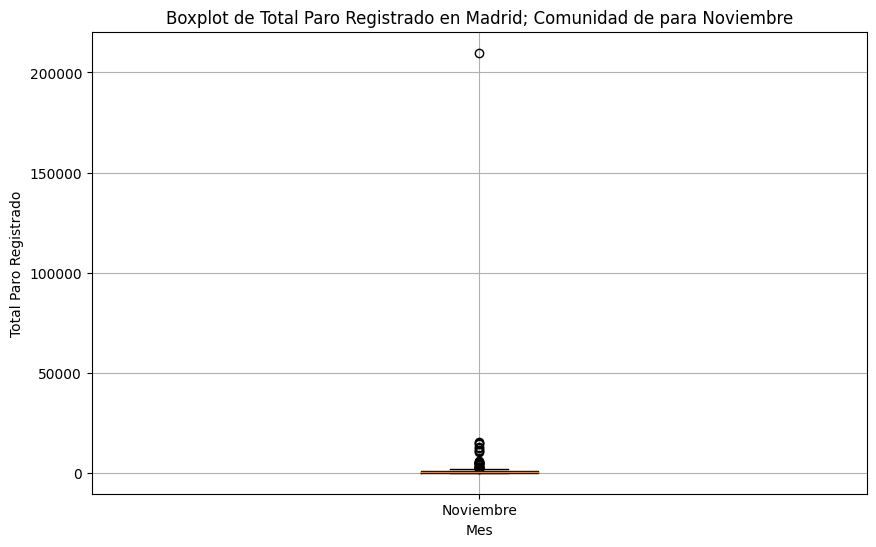

In [26]:
noviembre_madrid_df = df[(df['mes'] == 'Noviembre') & (df['Comunidad Autónoma'] == 'Madrid; Comunidad de')]

plt.figure(figsize=(10, 6))
plt.boxplot(noviembre_madrid_df['total Paro Registrado'])
plt.xticks([1], ['Noviembre'])
plt.xlabel('Mes')
plt.ylabel('Total Paro Registrado')
plt.title('Boxplot de Total Paro Registrado en Madrid; Comunidad de para Noviembre')
plt.grid(True)
plt.show()

## Predicción mediante Regresión Lineal

In [30]:
from sklearn.linear_model import LinearRegression

comunidades_mes_df = df.groupby(['Comunidad Autónoma', 'mes'])['total Paro Registrado'].sum().reset_index()

cataluna_madrid_df = comunidades_mes_df[comunidades_mes_df['Comunidad Autónoma'].isin(['Cataluña', 'Madrid; Comunidad de'])]

cataluna_df = cataluna_madrid_df[cataluna_madrid_df['Comunidad Autónoma'] == 'Cataluña']
madrid_df = cataluna_madrid_df[cataluna_madrid_df['Comunidad Autónoma'] == 'Madrid; Comunidad de']

X_train = cataluna_df.index.values.reshape(-1, 1)
y_train_cataluna = cataluna_df['total Paro Registrado'].values
y_train_madrid = madrid_df['total Paro Registrado'].values

model_cataluna = LinearRegression()
model_cataluna.fit(X_train, y_train_cataluna)

model_madrid = LinearRegression()
model_madrid.fit(X_train, y_train_madrid)

ultimo_indice = X_train[-1][0] + 1  # Último índice más uno para predecir diciembre
X_pred = [[ultimo_indice]]  # Utilizar el último índice más uno para predecir diciembre
y_pred_cataluna = model_cataluna.predict(X_pred)
y_pred_madrid = model_madrid.predict(X_pred)

print("Predicciones para Diciembre:")
print("Cataluña:", y_pred_cataluna[0])
print("Madrid; Comunidad de:", y_pred_madrid[0])

Predicciones para Diciembre:
Cataluña: 483459.39999999997
Madrid; Comunidad de: 426612.5818181818


## Conclusiones del proyecto

Predicción: El dato oficial publicado por el Gobierno de España (dato ficticio) es veraz, dado que se observa una disminución en la cantidad de desempleados con respecto a noviembre y la diferencia en términos absolutos no es significativa.
- Se predice un número de desempleados para diciembre de 2020 en Cataluña de: 483.459
- Se predice un número de desempleados para diciembre de 2020 en la Comunidad de Madrid de: 426.612

Otras observaciones:
- Cataluña y la Comunidad Autónoma de Madrid son las dos comunidades con mayor cantidad de desempleados en España durante 2020.
- Cataluña tiene mayor cantidad de desempleados que la Comunidad de Madrid. Comportamiento que es constante durante los primeros once meses de 2020.
- La Comunidad de Madrid tiene el municipio con mayor cantidad de desempleados con un total de 209.851, superando en más del doble al municipio catalán con mayor cantidad de desempleados: Barcelona con 92.401.
- El promedio por municipios de Cataluña es mucho menor al de la Comunidad de Madrid. Esto se debe a que, a pesar de poseer mayor cantidad de desempleados, Cataluña cuenta con 947 municipios (registros), contra tan solo 179 de la Comunidad de Madrid.
- Más allá de nuestro análisis, llama la atención de la cantidad de desempleado en la Comunitat Valenciana y, especialmente, en Andalucía que, por mucho, es la Comunidad Autónoma con mayor número de desempleados durante el año 2020.
